# Installing required Libraries

In [1]:
!pip install torch-geometric

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install sentence-transformers

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.nn import GATConv, Linear
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import torch
from torch_geometric.data import (InMemoryDataset, Data)
from typing import Optional, Callable
from torch_geometric.loader import NeighborLoader

# Reading the file

In [4]:
df=pd.read_csv("LI-Small_Trans.csv")

In [5]:
#Showing the dataframe
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:08,11,8000ECA90,11,8000ECA90,3.195403e+06,US Dollar,3.195403e+06,US Dollar,Reinvestment,0
1,2022/09/01 00:21,3402,80021DAD0,3402,80021DAD0,1.858960e+03,US Dollar,1.858960e+03,US Dollar,Reinvestment,0
2,2022/09/01 00:00,11,8000ECA90,1120,8006AA910,5.925710e+05,US Dollar,5.925710e+05,US Dollar,Cheque,0
3,2022/09/01 00:16,3814,8006AD080,3814,8006AD080,1.232000e+01,US Dollar,1.232000e+01,US Dollar,Reinvestment,0
4,2022/09/01 00:00,20,8006AD530,20,8006AD530,2.941560e+03,US Dollar,2.941560e+03,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
6924044,2022/09/10 23:39,71696,81B2518F1,71528,81C0482E1,3.346900e-02,Bitcoin,3.346900e-02,Bitcoin,Bitcoin,0
6924045,2022/09/10 23:48,271241,81B567481,173457,81C0DA751,1.313000e-03,Bitcoin,1.313000e-03,Bitcoin,Bitcoin,0
6924046,2022/09/10 23:50,271241,81B567481,173457,81C0DA751,1.305800e-02,Bitcoin,1.305800e-02,Bitcoin,Bitcoin,0
6924047,2022/09/10 23:57,170558,81A2206B1,275798,81C1D5CA1,4.145370e-01,Bitcoin,4.145370e-01,Bitcoin,Bitcoin,0


In [6]:
df['Amount Received']

0          3.195403e+06
1          1.858960e+03
2          5.925710e+05
3          1.232000e+01
4          2.941560e+03
               ...     
6924044    3.346900e-02
6924045    1.313000e-03
6924046    1.305800e-02
6924047    4.145370e-01
6924048    3.427700e-02
Name: Amount Received, Length: 6924049, dtype: float64

In [7]:
#Finding the data types in the columns
print(df.dtypes)

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object


In [8]:
# Converting the formatted values to float data type
df['Amount Received'] = df['Amount Received'].astype(float)
df['Amount Paid'] = df['Amount Paid'].astype(float)

# Setting the display format for floating-point numbers to suppress scientific notation
pd.options.display.float_format = '{:.6f}'.format

# Showing the DataFrame after conversion
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:08,11,8000ECA90,11,8000ECA90,3195403.000000,US Dollar,3195403.000000,US Dollar,Reinvestment,0
1,2022/09/01 00:21,3402,80021DAD0,3402,80021DAD0,1858.960000,US Dollar,1858.960000,US Dollar,Reinvestment,0
2,2022/09/01 00:00,11,8000ECA90,1120,8006AA910,592571.000000,US Dollar,592571.000000,US Dollar,Cheque,0
3,2022/09/01 00:16,3814,8006AD080,3814,8006AD080,12.320000,US Dollar,12.320000,US Dollar,Reinvestment,0
4,2022/09/01 00:00,20,8006AD530,20,8006AD530,2941.560000,US Dollar,2941.560000,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
6924044,2022/09/10 23:39,71696,81B2518F1,71528,81C0482E1,0.033469,Bitcoin,0.033469,Bitcoin,Bitcoin,0
6924045,2022/09/10 23:48,271241,81B567481,173457,81C0DA751,0.001313,Bitcoin,0.001313,Bitcoin,Bitcoin,0
6924046,2022/09/10 23:50,271241,81B567481,173457,81C0DA751,0.013058,Bitcoin,0.013058,Bitcoin,Bitcoin,0
6924047,2022/09/10 23:57,170558,81A2206B1,275798,81C1D5CA1,0.414537,Bitcoin,0.414537,Bitcoin,Bitcoin,0


In [9]:
print(df.dtypes)

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object


In [10]:
#checking for null values
print(df.isnull().sum())

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64


In [11]:
# Checking if amount received is equal to amound paid
print('Amount Received equals to Amount Paid:')
print(df['Amount Received'].equals(df['Amount Paid']))

Amount Received equals to Amount Paid:
False


In [12]:
#Checking if the currency receiving and currency paying is same
print('Receiving Currency equals to Payment Currency:')
print(df['Receiving Currency'].equals(df['Payment Currency']))

Receiving Currency equals to Payment Currency:
False


In [13]:
# Showing the dataframe with different amounts
not_equal1 = df.query('`Amount Received` != `Amount Paid`')
not_equal1

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
2770,2022/09/01 00:12,394,80056EDE0,394,80056EDE0,47.610000,Euro,55.790000,US Dollar,ACH,0
8081,2022/09/01 00:28,11701,800C95BF0,11701,800C95BF0,954.620000,Yuan,142.530000,US Dollar,ACH,0
10451,2022/09/01 00:18,22481,80105E630,22481,80105E630,16930.030000,Yen,160.630000,US Dollar,ACH,0
12948,2022/09/01 00:17,1439,8014545C0,1439,8014545C0,14.520000,UK Pound,18.760000,US Dollar,ACH,0
13799,2022/09/01 00:02,20,8015D68E0,20,8015D68E0,37.000000,Euro,43.350000,US Dollar,ACH,0
...,...,...,...,...,...,...,...,...,...,...,...
6924007,2022/09/10 23:57,9096,80356BD61,9096,80356BD60,0.000005,Bitcoin,0.390000,Yuan,ACH,0
6924009,2022/09/10 23:30,9096,80356BD61,9096,80356BD60,0.000007,Bitcoin,0.550000,Yuan,ACH,0
6924019,2022/09/10 23:38,13474,803A93631,13474,803A93630,0.000007,Bitcoin,0.080000,US Dollar,ACH,0
6924021,2022/09/10 23:31,13474,803A93631,13474,803A93630,0.000020,Bitcoin,0.230000,US Dollar,ACH,0


In [14]:
# Showing the dataframe with different currency
not_equal2 = df.query('`Receiving Currency` != `Payment Currency`')
not_equal2

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
2770,2022/09/01 00:12,394,80056EDE0,394,80056EDE0,47.610000,Euro,55.790000,US Dollar,ACH,0
8081,2022/09/01 00:28,11701,800C95BF0,11701,800C95BF0,954.620000,Yuan,142.530000,US Dollar,ACH,0
10451,2022/09/01 00:18,22481,80105E630,22481,80105E630,16930.030000,Yen,160.630000,US Dollar,ACH,0
12948,2022/09/01 00:17,1439,8014545C0,1439,8014545C0,14.520000,UK Pound,18.760000,US Dollar,ACH,0
13799,2022/09/01 00:02,20,8015D68E0,20,8015D68E0,37.000000,Euro,43.350000,US Dollar,ACH,0
...,...,...,...,...,...,...,...,...,...,...,...
6924007,2022/09/10 23:57,9096,80356BD61,9096,80356BD60,0.000005,Bitcoin,0.390000,Yuan,ACH,0
6924009,2022/09/10 23:30,9096,80356BD61,9096,80356BD60,0.000007,Bitcoin,0.550000,Yuan,ACH,0
6924019,2022/09/10 23:38,13474,803A93631,13474,803A93630,0.000007,Bitcoin,0.080000,US Dollar,ACH,0
6924021,2022/09/10 23:31,13474,803A93631,13474,803A93630,0.000020,Bitcoin,0.230000,US Dollar,ACH,0


In [15]:
# Printing unique currency for receiving
print(sorted(df['Receiving Currency'].unique()))

['Australian Dollar', 'Bitcoin', 'Brazil Real', 'Canadian Dollar', 'Euro', 'Mexican Peso', 'Ruble', 'Rupee', 'Saudi Riyal', 'Shekel', 'Swiss Franc', 'UK Pound', 'US Dollar', 'Yen', 'Yuan']


In [16]:
#Printing unique currency for paying
print(sorted(df['Payment Currency'].unique()))

['Australian Dollar', 'Bitcoin', 'Brazil Real', 'Canadian Dollar', 'Euro', 'Mexican Peso', 'Ruble', 'Rupee', 'Saudi Riyal', 'Shekel', 'Swiss Franc', 'UK Pound', 'US Dollar', 'Yen', 'Yuan']


# Data Visualization based on regular currency and crypto currency

In [17]:
# Grouping the DataFrame by the 'Payment Currency'and calculating the sum of 'Amount Paid' for each currency
total_amount_paid_by_currency = df.groupby('Payment Currency')['Amount Paid'].sum()

# Showing the total amount paid by currency
total_amount_paid_by_currency

Payment Currency
Australian Dollar      90598620802.319992
Bitcoin                    8914327.319124
Brazil Real           377533117815.190002
Canadian Dollar        70710358161.440002
Euro                  431400932517.239990
Mexican Peso          735902032442.630005
Ruble                2551137128861.500000
Rupee               10410659480225.039062
Saudi Riyal           293420126799.159973
Shekel                171179419121.450012
Swiss Franc            46771397410.270004
UK Pound               20342844511.169998
US Dollar             922584120404.969971
Yen                 15154672420106.330078
Yuan                 1100181287029.149902
Name: Amount Paid, dtype: float64

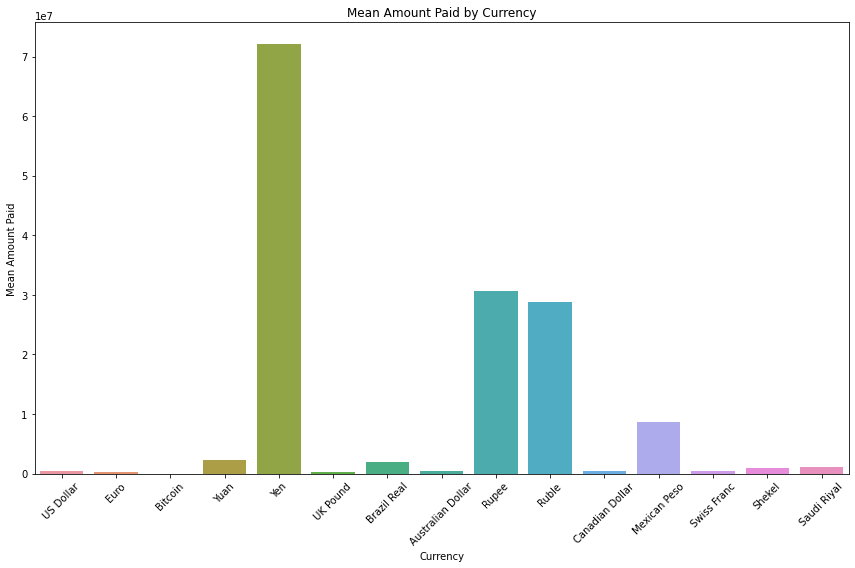

In [18]:
# Setting the figure size
plt.figure(figsize=(12, 8))

# Creating bar plot showing the mean amount paid by currency
sns.barplot(x='Payment Currency', y='Amount Paid', data=df, ci=None)

# Adding title and labels
plt.title('Mean Amount Paid by Currency')
plt.xlabel('Currency')
plt.ylabel('Mean Amount Paid')

# Showing plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Defining the exchange rates
exchange_rates = {
    'Australian Dollar': 0.66,
    'Bitcoin': 71450,
    'Brazil Real': 0.20,
    'Canadian Dollar': 0.74,
    'Euro': 1.09,
    'Mexican Peso': 0.61,
    'Ruble': 0.011,
    'Rupee': 0.012,
    'Saudi Riyal': 0.27,
    'Shekel': 0.27,
    'Swiss Franc': 1.10,
    'UK Pound': 1.27,
    'US Dollar': 1.00,
    'Yen': 0.0066,
    'Yuan': 0.14
}

# Converting each currency amount to USD using the exchange rates and sum their totals
total_amount_usd = sum(amount * exchange_rates.get(currency, 1.0) for currency, amount in total_amount_paid_by_currency.items())

# Printing the total amount in USD
print("Total Amount in USD:", total_amount_usd)

Total Amount in USD: 3276029909338.2183


In [20]:
# Initialize lists to store currency and USD equivalent values
currency_list = []
usd_equivalent_list = []

# Iterate over the currencies and their equivalent values in USD
for currency, amount in total_amount_paid_by_currency.items():
    exchange_rate = exchange_rates.get(currency, 1.0)
    amount_usd = amount * exchange_rate
    # Append currency and USD equivalent values to the respective lists
    currency_list.append(currency)
    usd_equivalent_list.append(amount_usd)

# Create a DataFrame from the lists
df_currency_usd = pd.DataFrame({'Currency': currency_list, 'USD Equivalent': usd_equivalent_list})

# Display the DataFrame

df_currency_usd

,Currency,USD Equivalent
0,Australian Dollar,59795089729.531197
1,Bitcoin,636928686951.409790
2,Brazil Real,75506623563.038010
3,Canadian Dollar,52325665039.465599
4,Euro,470227016443.791626
5,Mexican Peso,448900239790.004272
6,Ruble,28062508417.476498
7,Rupee,124927913762.700470
8,Saudi Riyal,79223434235.773193
9,Shekel,46218443162.791504


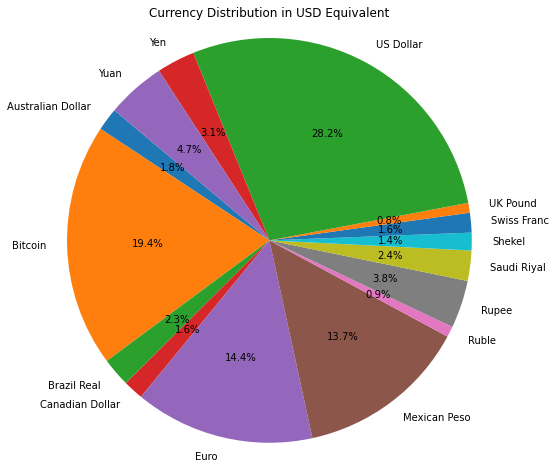

In [21]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_currency_usd['USD Equivalent'], labels=df_currency_usd['Currency'], autopct='%1.1f%%', startangle=140)
plt.title('Currency Distribution in USD Equivalent')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Displaying the pie chart
plt.show()

In [22]:
# Calculate the total amount in USD for the top five currencies
top_five_currencies = df_currency_usd.sort_values(by='USD Equivalent', ascending=False)

# Calculate the percentage of each top five currency relative to total USD amount
total_top_five_usd = top_five_currencies['USD Equivalent'].sum()
top_five_currencies['Percentage to Total USD'] = (top_five_currencies['USD Equivalent'] / total_amount_usd) * 100

# Display the updated DataFrame
print("Top Five transactions Currencies:")
for index, row in top_five_currencies.head(5).iterrows():
    percentage = row['Percentage to Total USD']
    print(f"{row['Currency']}: {percentage:.2f}% of Total (USD {row['USD Equivalent']:.2f})")

Top Five transactions Currencies:
US Dollar: 28.16% of Total (USD 922584120404.97)
Bitcoin: 19.44% of Total (USD 636928686951.41)
Euro: 14.35% of Total (USD 470227016443.79)
Mexican Peso: 13.70% of Total (USD 448900239790.00)
Yuan: 4.70% of Total (USD 154025380184.08)


In [23]:
# Calculating the percentage of total amount paid in US Dollars compared to the overall total amount paid
usd_percentage = (total_amount_paid_by_currency.loc['US Dollar']/total_amount_usd) * 100

# Showing the percentage of USD from the total
print("Percentage of USD from the total amount:", usd_percentage)

Percentage of USD from the total amount: 28.161651326050887


In [24]:
# Counting the number of transactions with the same receiving and payment currencies
same_currency_count = df[df['Receiving Currency'] == df['Payment Currency']].shape[0]

# Counting the number of transactions with different receiving and payment currencies
cross_currency_count = df[df['Receiving Currency'] != df['Payment Currency']].shape[0]

# Showing the results
print("Number of transactions with the same receiving and payment currencies:", same_currency_count)
print("Number of transactions with different receiving and payment currencies:", cross_currency_count)

Number of transactions with the same receiving and payment currencies: 6825173
Number of transactions with different receiving and payment currencies: 98876


In [25]:
# Calculating the total number of transactions in the DataFrame
total_transactions = df.shape[0]

# Percentage of transactions with the same receiving and payment currencies
same_currency_percentage = (same_currency_count / total_transactions) * 100

# Percentage of transactions with different receiving and payment currencies
cross_currency_percentage = (cross_currency_count / total_transactions) * 100

# Showing the results with two decimal places
print("Percentage of transactions with the same receiving and payment currencies: {:.2f}%".format(same_currency_percentage))
print("Percentage of transactions with different receiving and payment currencies: {:.2f}%".format(cross_currency_percentage))

Percentage of transactions with the same receiving and payment currencies: 98.57%
Percentage of transactions with different receiving and payment currencies: 1.43%


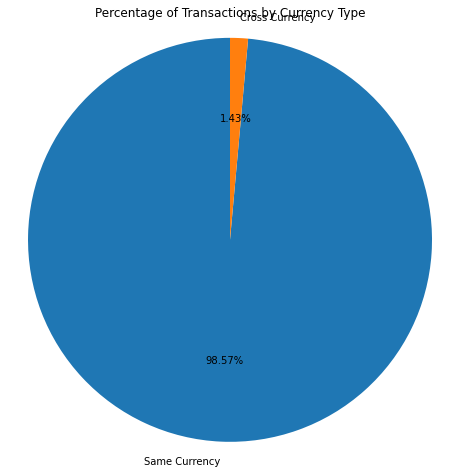

In [26]:
# Creating a list containing the calculated percentages for same currency and cross currency transactions
percentages = [same_currency_percentage, cross_currency_percentage]
labels = ['Same Currency', 'Cross Currency']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Percentage of Transactions by Currency Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Currency with the Highest Number of Laundering Transactions: US Dollar
Number of Laundering Transactions: 1456


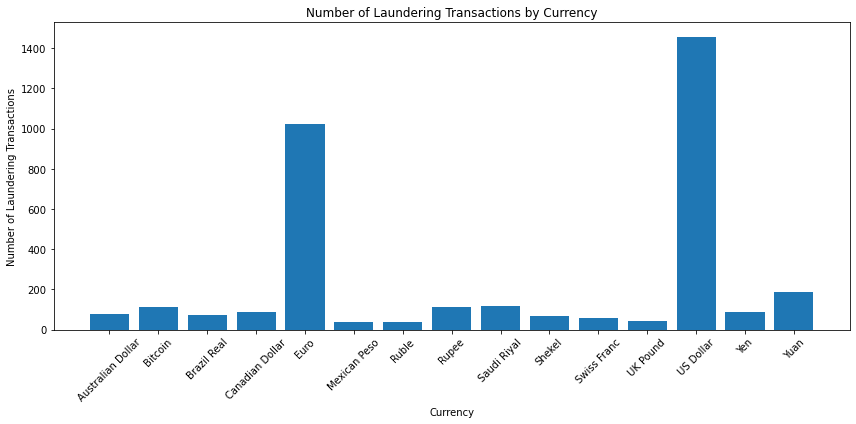

In [27]:
# Grouping the dataset by payment currency
grouped_by_currency = df.groupby('Payment Currency')

# Initializing lists to store currency and corresponding laundering transaction counts
currencies = []
transaction_counts = []

# Initializing variables to store the currency with the highest number of laundering transactions
max_laundering_currency = None
max_laundering_count = 0

# Iterating over each currency group
for currency, group in grouped_by_currency:
    # Filtering the laundering transactions for the current currency
    laundering_transactions = group[group['Is Laundering'] == 1]
    
    # Counting the number of laundering transactions
    num_laundering_transactions = len(laundering_transactions)
    
    # Appending currency and its corresponding laundering transaction count to the lists
    currencies.append(currency)
    transaction_counts.append(num_laundering_transactions)
    
    # Updating the maximum laundering count and currency if needed
    if num_laundering_transactions > max_laundering_count:
        max_laundering_count = num_laundering_transactions
        max_laundering_currency = currency

# Printing the currency with the highest number of laundering transactions
print("Currency with the Highest Number of Laundering Transactions:", max_laundering_currency)
print("Number of Laundering Transactions:", max_laundering_count)

# Creating a bar plot
plt.figure(figsize=(12, 6))
plt.bar(currencies, transaction_counts)

# Adding labels and title
plt.xlabel('Currency')
plt.ylabel('Number of Laundering Transactions')
plt.title('Number of Laundering Transactions by Currency')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Showing plot
plt.tight_layout()
plt.show()

In [28]:
# Calculating the total number of laundering transactions
total_laundering_transactions = df['Is Laundering'].sum()

# Calculating the percentage of laundering transactions for each currency
percentage_of_laundering_transactions = {}
for currency in df['Payment Currency'].unique():
    currency_laundering_count = df[df['Payment Currency'] == currency]['Is Laundering'].sum()
    percentage_of_laundering_transactions[currency] = (currency_laundering_count / total_laundering_transactions) * 100

# Printing the results
for currency, percentage in percentage_of_laundering_transactions.items():
    print("Percentage of Laundering Transactions for {}: {:.2f}%".format(currency, percentage))

Percentage of Laundering Transactions for US Dollar: 40.84%
Percentage of Laundering Transactions for Euro: 28.75%
Percentage of Laundering Transactions for Bitcoin: 3.09%
Percentage of Laundering Transactions for Yuan: 5.30%
Percentage of Laundering Transactions for Yen: 2.41%
Percentage of Laundering Transactions for UK Pound: 1.12%
Percentage of Laundering Transactions for Brazil Real: 2.02%
Percentage of Laundering Transactions for Australian Dollar: 2.16%
Percentage of Laundering Transactions for Rupee: 3.14%
Percentage of Laundering Transactions for Ruble: 1.09%
Percentage of Laundering Transactions for Canadian Dollar: 2.41%
Percentage of Laundering Transactions for Mexican Peso: 1.04%
Percentage of Laundering Transactions for Swiss Franc: 1.57%
Percentage of Laundering Transactions for Shekel: 1.82%
Percentage of Laundering Transactions for Saudi Riyal: 3.23%


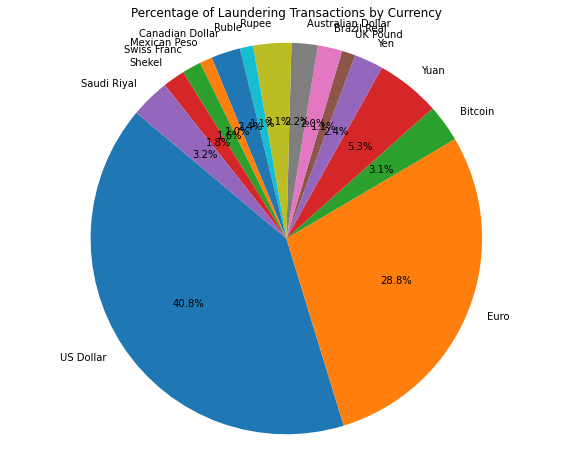

In [29]:
# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(percentage_of_laundering_transactions.values(), labels=percentage_of_laundering_transactions.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Laundering Transactions by Currency')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [30]:
# Filtering the DataFrame to include only transactions flagged as laundering (where the 'laundering' column equals 1)
laundering_transactions = df[df['Is Laundering'] == 1]

# Grouping the filtered DataFrame by payment currency and sum the amount paid
total_laundering_amount_paid_by_currency = laundering_transactions.groupby('Payment Currency')['Amount Paid'].sum()

# Showing the total amount paid by currency
print("Total Amount Paid by Currency for Laundered Transactions:")
print(total_laundering_amount_paid_by_currency)

# Sorting the dictionary by values in descending order
sorted_currencies = sorted(total_laundering_amount_paid_by_currency.items(), key=lambda x: x[1], reverse=True)

# Takeing the top five currencies
top_five_currencies = sorted_currencies[:5]

# Calculatting the total amount of the top five currencies
total_top_five = sum(amount for currency, amount in top_five_currencies)

# Printing the top five money laundering currencies and their percentages in regards to top five
print("\nTop Five Money Laundering Currencies:")
for currency, amount in top_five_currencies:
    percentage = (amount / total_top_five) * 100
    print(f"{currency}: {percentage:.2f}% of Total (USD {amount:.2f})")

print("\nTotal Amount of Top Five Currencies (USD):", total_top_five)

Total Amount Paid by Currency for Laundered Transactions:
Payment Currency
Australian Dollar   1258508672.050000
Bitcoin                   6934.041351
Brazil Real          242393482.210000
Canadian Dollar         556250.020000
Euro                3451630776.500000
Mexican Peso          19916710.880000
Ruble                 17269673.590000
Rupee               3442978426.240000
Saudi Riyal          515991324.040000
Shekel               658851166.610000
Swiss Franc            1549997.770000
UK Pound             195243679.580000
US Dollar           2358387413.910000
Yen                  341818903.040000
Yuan                 422308120.900000
Name: Amount Paid, dtype: float64

Top Five Money Laundering Currencies:
Euro: 30.90% of Total (USD 3451630776.50)
Rupee: 30.82% of Total (USD 3442978426.24)
US Dollar: 21.11% of Total (USD 2358387413.91)
Australian Dollar: 11.27% of Total (USD 1258508672.05)
Shekel: 5.90% of Total (USD 658851166.61)

Total Amount of Top Five Currencies (USD): 111703564

In [31]:
# Grouping the dataset by payment format
grouped_by_format = df.groupby('Payment Format')

# Initializing a dictionary to store laundering transaction counts by format
laundering_transactions_by_format = {}

# Iterating over each format group
for payment_format, group in grouped_by_format:
    # Filtering the laundering transactions for the current format
    laundering_transactions = group[group['Is Laundering'] == 1]
    
    # Counting the number of laundering transactions
    num_laundering_transactions = len(laundering_transactions)
    
    # Storing the laundering transaction count in the dictionary
    laundering_transactions_by_format[payment_format] = num_laundering_transactions

# Printing laundering transaction counts by format
for payment_format, num_transactions in laundering_transactions_by_format.items():
    print(f"Payment Format: {payment_format}, Number of Laundering Transactions: {num_transactions}")

Payment Format: ACH, Number of Laundering Transactions: 2611
Payment Format: Bitcoin, Number of Laundering Transactions: 110
Payment Format: Cash, Number of Laundering Transactions: 124
Payment Format: Cheque, Number of Laundering Transactions: 459
Payment Format: Credit Card, Number of Laundering Transactions: 261
Payment Format: Reinvestment, Number of Laundering Transactions: 0
Payment Format: Wire, Number of Laundering Transactions: 0


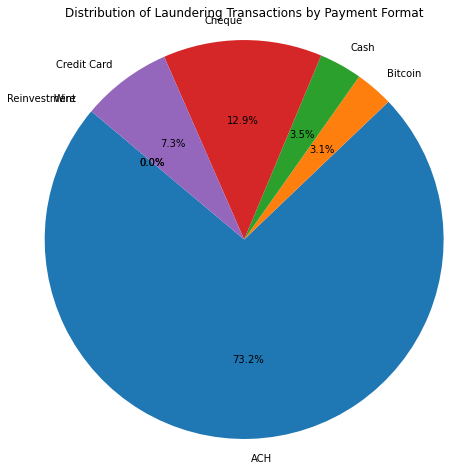

In [32]:
# Geting labels and sizes for the pie chart
labels = laundering_transactions_by_format.keys()
sizes = laundering_transactions_by_format.values()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Laundering Transactions by Payment Format')
plt.axis('equal')
plt.show()

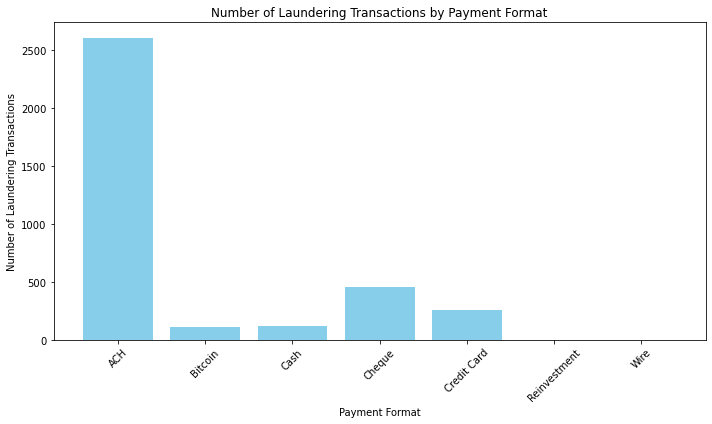

In [33]:
# Grouping the dataset by payment format
grouped_by_format = df.groupby('Payment Format')

# Initializing a dictionary to store transaction counts for each payment format
transaction_counts_by_format = {}

# Iterating over each payment format group
for payment_format, group in grouped_by_format:
    # Filtering the laundering transactions for the current payment format
    laundering_transactions = group[group['Is Laundering'] == 1]
    
    # Counting the number of transactions for the current payment format group
    transaction_count = len(laundering_transactions)
    
    # Storing the transaction count for the payment format
    transaction_counts_by_format[payment_format] = transaction_count

# Creating lists for plotting
labels = list(transaction_counts_by_format.keys())
counts = list(transaction_counts_by_format.values())

# Creating the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')

# Customizing the plot
plt.xlabel('Payment Format')
plt.ylabel('Number of Laundering Transactions')
plt.title('Number of Laundering Transactions by Payment Format')
plt.xticks(rotation=45)
plt.tight_layout()

# Showing the plot
plt.show()

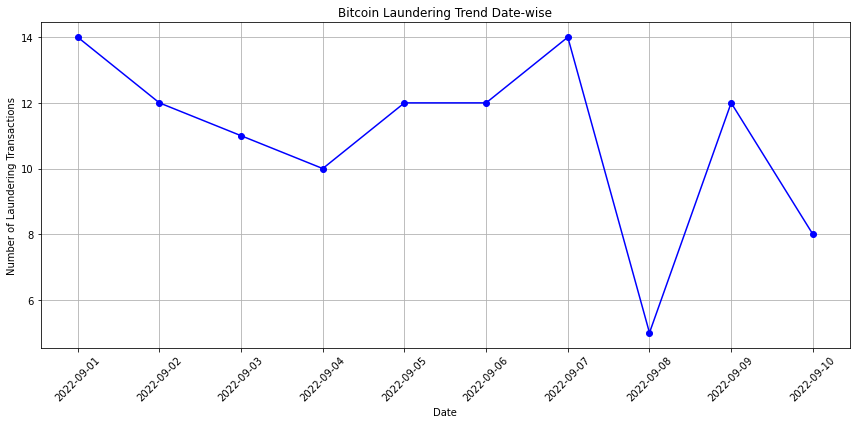

In [34]:
# Converting 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filtering for Bitcoin transactions
bitcoin_transactions = df[df['Payment Currency'] == 'Bitcoin']

# Filtering for laundering transactions
bitcoin_laundering = bitcoin_transactions[bitcoin_transactions['Is Laundering'] == 1]

# Grouping by date and count the number of laundering transactions for each date
bitcoin_laundering_trend = bitcoin_laundering.groupby(bitcoin_laundering['Timestamp'].dt.date).size()

# Plotting the Bitcoin laundering trend
plt.figure(figsize=(12, 6))
bitcoin_laundering_trend.plot(kind='line', marker='o', color='b')

# Customizing the plot
plt.title('Bitcoin Laundering Trend Date-wise')
plt.xlabel('Date')
plt.ylabel('Number of Laundering Transactions')
plt.grid(True)

# Showing the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Preprocessing

* Label encoding categorical columns with sklearn label encoder.
* Combining ‘From Bank’ and ‘Account’ column to create unique identifiers.
* Creating a function which prepares the data by extracting relevant account and bank information.


In [35]:
def preprocess(df):
    # Label encode categorical columns
    label_encoder = LabelEncoder()
    df['Payment Format'] = label_encoder.fit_transform(df['Payment Format'].astype(str))
    df['Payment Currency'] = label_encoder.fit_transform(df['Payment Currency'].astype(str))
    df['Receiving Currency'] = label_encoder.fit_transform(df['Receiving Currency'].astype(str))

    # Convert 'Timestamp' to datetime and normalize
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Timestamp'] = df['Timestamp'].sub(df['Timestamp'].min()).div((df['Timestamp'].max()-df['Timestamp'].min()).total_seconds())

    # Combine 'From Bank' and 'Account' to create 'Account' column
    df['Account'] = df['From Bank'].astype(str) + '_' + df['Account']
    df['Account.1'] = df['To Bank'].astype(str) + '_' + df['Account.1']

    # Sort dataframe by 'Account'
    df = df.sort_values(by=['Account'])

    # Create separate dataframes for receiving and paying transactions
    receiving_df = df[['Account.1', 'Amount Received', 'Receiving Currency']]
    paying_df = df[['Account', 'Amount Paid', 'Payment Currency']]
    receiving_df = receiving_df.rename(columns={'Account.1': 'Account'})

    # Get unique currencies
    currency_ls = sorted(df['Receiving Currency'].unique())

    return df, receiving_df, paying_df, currency_ls

In [36]:
df, receiving_df, paying_df, currency_ls = preprocess(df = df)
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
3408783,0 days 00:00:00.266146528,0,0_800060CE0,11314,11314_800990320,8081.580000,4,8081.580000,4,4,0
3986981,0 days 00:00:00.318925233,0,0_800060CE0,11314,11314_800990320,47468.310000,4,47468.310000,4,3,0
4804475,0 days 00:00:00.393399532,0,0_800060CE0,11314,11314_800990320,8081.580000,4,8081.580000,4,4,0
4804474,0 days 00:00:00.394150534,0,0_800060CE0,11314,11314_800990320,47468.310000,4,47468.310000,4,3,0
6690464,0 days 00:00:00.547730307,0,0_800060CE0,1390,1390_800E49870,787.720000,4,787.720000,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...
921251,0 days 00:00:00.026910881,9976,9976_81B85BF70,9976,9976_81B85BF70,58.400000,14,58.400000,14,5,0
3844698,0 days 00:00:00.304823097,9976,9976_81B85BF70,229822,229822_81B8694D0,27875.040000,14,27875.040000,14,0,0
301111,0 days 00:00:00.000458945,9976,9976_81B85BF70,9976,9976_81B85BF70,13931.140000,14,13931.140000,14,5,0
301142,0 days 00:00:00.000417222,9976,9976_81B878E00,9976,9976_81B878E00,41.990000,14,41.990000,14,5,0


In [37]:
print("\receiving_df:")
receiving_df

eceiving_df:


,Account,Amount Received,Receiving Currency
3408783,11314_800990320,8081.580000,4
3986981,11314_800990320,47468.310000,4
4804475,11314_800990320,8081.580000,4
4804474,11314_800990320,47468.310000,4
6690464,1390_800E49870,787.720000,4
...,...,...,...
921251,9976_81B85BF70,58.400000,14
3844698,229822_81B8694D0,27875.040000,14
301111,9976_81B85BF70,13931.140000,14
301142,9976_81B878E00,41.990000,14


In [38]:
print("\npaying_df:")
paying_df


paying_df:


,Account,Amount Paid,Payment Currency
3408783,0_800060CE0,8081.580000,4
3986981,0_800060CE0,47468.310000,4
4804475,0_800060CE0,8081.580000,4
4804474,0_800060CE0,47468.310000,4
6690464,0_800060CE0,787.720000,4
...,...,...,...
921251,9976_81B85BF70,58.400000,14
3844698,9976_81B85BF70,27875.040000,14
301111,9976_81B85BF70,13931.140000,14
301142,9976_81B878E00,41.990000,14


In [39]:
print("\nList of unique currencies:", currency_ls)


List of unique currencies: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [40]:
currency_ls = sorted(df['Receiving Currency'].unique())
currency_ls

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [41]:
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
3408783,0 days 00:00:00.266146528,0,0_800060CE0,11314,11314_800990320,8081.580000,4,8081.580000,4,4,0
3986981,0 days 00:00:00.318925233,0,0_800060CE0,11314,11314_800990320,47468.310000,4,47468.310000,4,3,0
4804475,0 days 00:00:00.393399532,0,0_800060CE0,11314,11314_800990320,8081.580000,4,8081.580000,4,4,0
4804474,0 days 00:00:00.394150534,0,0_800060CE0,11314,11314_800990320,47468.310000,4,47468.310000,4,3,0
6690464,0 days 00:00:00.547730307,0,0_800060CE0,1390,1390_800E49870,787.720000,4,787.720000,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...
921251,0 days 00:00:00.026910881,9976,9976_81B85BF70,9976,9976_81B85BF70,58.400000,14,58.400000,14,5,0
3844698,0 days 00:00:00.304823097,9976,9976_81B85BF70,229822,229822_81B8694D0,27875.040000,14,27875.040000,14,0,0
301111,0 days 00:00:00.000458945,9976,9976_81B85BF70,9976,9976_81B85BF70,13931.140000,14,13931.140000,14,5,0
301142,0 days 00:00:00.000417222,9976,9976_81B878E00,9976,9976_81B878E00,41.990000,14,41.990000,14,5,0


* Creating a function which aids in extracting and processing transaction data to better understand patterns of potiential suspicious transaction.

In [42]:
def get_all_account(df):
    # Selecting relevant columns from the original dataframe
    ldf = df[['Account', 'From Bank']]
    rdf = df[['Account.1', 'To Bank']]

    # Extracting suspicious transactions
    suspicious = df[df['Is Laundering'] == 1]
    s1 = suspicious[['Account', 'Is Laundering']]
    s2 = suspicious[['Account.1', 'Is Laundering']]
    s2 = s2.rename({'Account.1': 'Account'}, axis=1)
    suspicious = pd.concat([s1, s2], join='outer')
    suspicious = suspicious.drop_duplicates()

    # Renaming columns for consistency
    ldf = ldf.rename({'From Bank': 'Bank'}, axis=1)
    rdf = rdf.rename({'Account.1': 'Account', 'To Bank': 'Bank'}, axis=1)

    # Merging dataframes to get all accounts
    df = pd.concat([ldf, rdf], join='outer')
    df = df.drop_duplicates()

    # Initializing 'Is Laundering' column to 0
    df['Is Laundering'] = 0

    # Updating 'Is Laundering' column with suspicious transactions
    df.set_index('Account', inplace=True)
    df.update(suspicious.set_index('Account'))
    df = df.reset_index()

    return df

In [43]:
accounts = get_all_account(df)

In [44]:
accounts

,Account,Bank,Is Laundering
0,0_800060CE0,0,0.000000
1,0_800061260,0,0.000000
2,0_800062D90,0,0.000000
3,0_800062F80,0,0.000000
4,0_800064980,0,0.000000
...,...,...,...
705902,210858_813087220,210858,0.000000
705903,17213_805787100,17213,0.000000
705904,212379_81900FD60,212379,0.000000
705905,12066_80D96E9A0,12066,0.000000


In [45]:
print(paying_df.dtypes)

Account              object
Amount Paid         float64
Payment Currency      int32
dtype: object


In [46]:
print(receiving_df.dtypes)

Account                object
Amount Received       float64
Receiving Currency      int32
dtype: object


# Node Features
* The feature performs data preprocessing on financial transaction data by calculating average paid and received amounts for each currency per account, encoding categorical bank names, and normalizing numerical attributes.
* These processed data can be further used for tasks such as fraud detection or network analysis in financial systems.


In [47]:
def paid_currency_aggregate(currency_ls, paying_df, accounts):
    for i in currency_ls:
        temp = paying_df[paying_df['Payment Currency'] == i]
        accounts['avg paid '+str(i)] = temp['Amount Paid'].groupby(temp['Account']).transform('mean')
    return accounts

def received_currency_aggregate(currency_ls, receiving_df, accounts):
    for i in currency_ls:
        temp = receiving_df[receiving_df['Receiving Currency'] == i]
        accounts['avg received '+str(i)] = temp['Amount Received'].groupby(temp['Account']).transform('mean')
    accounts = accounts.fillna(0)
    return accounts

def get_node_attr(currency_ls, paying_df, receiving_df, accounts):
    node_df = paid_currency_aggregate(currency_ls, paying_df, accounts.copy())
    node_df = received_currency_aggregate(currency_ls, receiving_df, node_df)
    node_df = node_df.drop(['Account', 'Is Laundering'], axis=1)
    
    # Converting 'Bank' column to strings
    node_df['Bank'] = node_df['Bank'].astype(str)
    
    # Applying LabelEncoder to categorical columns
    label_encoder = LabelEncoder()
    node_df['Bank'] = label_encoder.fit_transform(node_df['Bank'])
    
    # Normalizing numerical columns using StandardScaler
    scaler = StandardScaler()
    node_df[node_df.columns[1:]] = scaler.fit_transform(node_df[node_df.columns[1:]])
    
    return node_df

node_df = get_node_attr(currency_ls, paying_df, receiving_df, accounts)
node_df

,Bank,avg paid 0,avg paid 1,avg paid 2,avg paid 3,avg paid 4,avg paid 5,avg paid 6,avg paid 7,avg paid 8,...,avg received 5,avg received 6,avg received 7,avg received 8,avg received 9,avg received 10,avg received 11,avg received 12,avg received 13,avg received 14
0,0,-0.011380,-0.005488,-0.010290,-0.009441,-0.020464,-0.002436,-0.005232,-0.006164,-0.010662,...,-0.003399,-0.005734,-0.006331,-0.014464,-0.011039,-0.005647,-0.005240,-0.016123,-0.009792,-0.010607
1,0,-0.011380,-0.005488,-0.010290,-0.009441,-0.020464,-0.002436,-0.005232,-0.006164,-0.010662,...,-0.003399,-0.005734,-0.006331,-0.014464,-0.011039,-0.005647,-0.005240,-0.029868,-0.009792,-0.010607
2,0,-0.011380,-0.005488,-0.010290,-0.009441,-0.020464,-0.002436,-0.005232,-0.006164,-0.010662,...,-0.003399,-0.005734,-0.006331,-0.014464,-0.011039,-0.005647,-0.005240,0.066065,-0.009792,-0.010607
3,0,-0.011380,-0.005488,-0.010290,-0.009441,-0.020464,-0.002436,-0.005232,-0.006164,-0.010662,...,-0.003399,-0.005734,-0.006331,-0.014464,-0.011039,-0.005647,-0.005240,-0.030167,-0.009792,-0.010607
4,0,-0.011380,-0.005488,-0.010290,-0.009441,-0.020464,-0.002436,-0.005232,-0.006164,-0.010662,...,-0.003399,-0.005734,-0.006331,-0.014464,-0.011039,-0.005647,-0.005240,-0.030136,-0.009792,-0.010607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705902,917,-0.011380,-0.005488,-0.010290,-0.009441,-0.020464,-0.002436,-0.005232,-0.006164,-0.010662,...,-0.003399,-0.005734,-0.006331,-0.014464,-0.011039,-0.005647,-0.005240,-0.028851,-0.009792,-0.010607
705903,804,-0.011380,-0.005488,-0.010290,-0.009441,-0.020464,-0.002436,-0.005232,-0.006164,-0.010662,...,-0.003399,-0.005734,-0.006331,-0.014464,-0.011039,-0.005647,-0.005240,-0.028851,-0.009792,-0.010607
705904,931,-0.011380,-0.005488,-0.010290,-0.009441,-0.020464,-0.002436,-0.005232,-0.006164,-0.010662,...,-0.003399,-0.005734,-0.006331,-0.014464,-0.011039,-0.005647,-0.005240,-0.028851,-0.009792,-0.010607
705905,158,-0.011380,-0.005488,-0.010290,-0.009441,-0.020464,-0.002436,-0.005232,-0.006164,-0.010662,...,-0.003399,-0.005734,-0.006331,-0.014464,-0.011039,-0.005647,-0.005240,-0.030104,-0.009792,-0.010607


# Edge Features
* The use of the edge feature is to provide additional information or attributes associated with the transaction (edges ) in the graph. 

* These features includes transaction amounts, timestamp, or any other relevant information that might help in analyzing patterns in the transactions.

* By using this feature machine learning models can better understand the relationship between accounts and help identifying suspicious transaction.


In [48]:
def get_edge_df(accounts, df):
    # Resetting index of accounts DataFrame and create a new 'ID' column
    accounts = accounts.reset_index(drop=True)
    accounts['ID'] = accounts.index
    
    # Creating a mapping dictionary for account names to IDs
    mapping_dict = dict(zip(accounts['Account'], accounts['ID']))
    
    # Mapping 'Account' and 'Account.1' columns to their corresponding IDs
    df['From'] = df['Account'].map(mapping_dict)
    df['To'] = df['Account.1'].map(mapping_dict)
    df = df.drop(['Account', 'Account.1', 'From Bank', 'To Bank'], axis=1)
    
    # Stacking 'From' and 'To' columns to create edge index array
    edge_index = np.stack([df['From'].values, df['To'].values], axis=0)

    # Dropping unnecessary columns from df to obtain edge attributes
    df = df.drop(['Is Laundering', 'From', 'To'], axis=1)

    # Converting edge attributes to NumPy array
    edge_attr = df
    
    return edge_attr, edge_index


In [49]:
edge_attr, edge_index = get_edge_df(accounts, df)
edge_attr

,Timestamp,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format
3408783,0 days 00:00:00.266146528,8081.580000,4,8081.580000,4,4
3986981,0 days 00:00:00.318925233,47468.310000,4,47468.310000,4,3
4804475,0 days 00:00:00.393399532,8081.580000,4,8081.580000,4,4
4804474,0 days 00:00:00.394150534,47468.310000,4,47468.310000,4,3
6690464,0 days 00:00:00.547730307,787.720000,4,787.720000,4,3
...,...,...,...,...,...,...
921251,0 days 00:00:00.026910881,58.400000,14,58.400000,14,5
3844698,0 days 00:00:00.304823097,27875.040000,14,27875.040000,14,0
301111,0 days 00:00:00.000458945,13931.140000,14,13931.140000,14,5
301142,0 days 00:00:00.000417222,41.990000,14,41.990000,14,5


In [50]:
edge_index

array([[     0,      0,      0, ..., 681281, 681282, 681282],
       [ 22343,  22343,  22343, ..., 681281, 681282, 681282]], dtype=int64)

# Model Architecture
* We will define Graph Attention Network (GAT) model using PyTorch and PyTorch Gemoetry.
* This GAT model is designed to process graph-structured data with node features and edge features.
* It leverages attention mechanism to capture the relationship between nodes in the graph and produce node-level predictions.


In [51]:
class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads):
        super().__init__()
        # Defining the  GAT layers with specified parameters
        self.conv1 = GATConv(in_channels, hidden_channels, heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * heads, int(hidden_channels/4), heads=1, concat=False, dropout=0.6)
        self.lin = Linear(int(hidden_channels/4), out_channels)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, edge_index, edge_attr):
        # Applying dropout to the input features
        x = F.dropout(x, p=0.6, training=self.training)
        # Applying the GAT layers followed by ELU activation function
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.lin(x)
        x = self.sigmoid(x)
        
        return x

In [52]:
class AMLtoGraph(InMemoryDataset):

    def __init__(self, root: str, edge_window_size: int = 10,
                 transform: Optional[Callable] = None,
                 pre_transform: Optional[Callable] = None):
        # Initializing the AMLtoGraph class
        self.edge_window_size = edge_window_size
        # Calling the constructor of the parent class (InMemoryDataset)
        super().__init__(root, transform, pre_transform)
        # Loading the processed data from the saved file
        self.data, self.slices = torch.load(self.processed_paths[0])
        
    # Returning the filename of the raw dataset
    @property
    def raw_file_names(self) -> str:
        return ['LI-Small_Trans.csv']
    
    # Returning the filename of the processed dataset
    @property
    def processed_file_names(self) -> str:
        return ['data.pt']
    
    # Returning the number of nodes in the graph
    @property
    def num_nodes(self) -> int:
        return self._data.edge_index.max().item() + 1
    
    # Labeling encoder function to encode categorical columns
    def df_label_encoder(self, df, columns):
        le = preprocessing.LabelEncoder()
        for i in columns:
            df[i] = le.fit_transform(df[i].astype(str))
        return df

    # Preprocessing the raw dataframe 
    def preprocess(self, df):
        df = self.df_label_encoder(df,['Payment Format', 'Payment Currency', 'Receiving Currency'])
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        df['Timestamp'] = df['Timestamp'].apply(lambda x: x.value)
        df['Timestamp'] = (df['Timestamp']-df['Timestamp'].min())/(df['Timestamp'].max()-df['Timestamp'].min())

        df['Account'] = df['From Bank'].astype(str) + '_' + df['Account']
        df['Account.1'] = df['To Bank'].astype(str) + '_' + df['Account.1']
        df = df.sort_values(by=['Account'])
        receiving_df = df[['Account.1', 'Amount Received', 'Receiving Currency']]
        paying_df = df[['Account', 'Amount Paid', 'Payment Currency']]
        receiving_df = receiving_df.rename({'Account.1': 'Account'}, axis=1)
        currency_ls = sorted(df['Receiving Currency'].unique())

        return df, receiving_df, paying_df, currency_ls
    
    # Getting all accounts involved in transactions
    def get_all_account(self, df):
        ldf = df[['Account', 'From Bank']]
        rdf = df[['Account.1', 'To Bank']]
        suspicious = df[df['Is Laundering']==1]
        s1 = suspicious[['Account', 'Is Laundering']]
        s2 = suspicious[['Account.1', 'Is Laundering']]
        s2 = s2.rename({'Account.1': 'Account'}, axis=1)
        suspicious = pd.concat([s1, s2], join='outer')
        suspicious = suspicious.drop_duplicates()

        ldf = ldf.rename({'From Bank': 'Bank'}, axis=1)
        rdf = rdf.rename({'Account.1': 'Account', 'To Bank': 'Bank'}, axis=1)
        df = pd.concat([ldf, rdf], join='outer')
        df = df.drop_duplicates()

        df['Is Laundering'] = 0
        df.set_index('Account', inplace=True)
        df.update(suspicious.set_index('Account'))
        df = df.reset_index()
        return df
    
    # Aggregating average payment amount per currency
    def paid_currency_aggregate(self, currency_ls, paying_df, accounts):
        for i in currency_ls:
            temp = paying_df[paying_df['Payment Currency'] == i]
            accounts['avg paid '+str(i)] = temp['Amount Paid'].groupby(temp['Account']).transform('mean')
        return accounts
    
    # Aggregating average received amount per currency
    def received_currency_aggregate(self, currency_ls, receiving_df, accounts):
        for i in currency_ls:
            temp = receiving_df[receiving_df['Receiving Currency'] == i]
            accounts['avg received '+str(i)] = temp['Amount Received'].groupby(temp['Account']).transform('mean')
        accounts = accounts.fillna(0)
        return accounts
    
    # Getting edge attributes and edge indices
    def get_edge_df(self, accounts, df):
        accounts = accounts.reset_index(drop=True)
        accounts['ID'] = accounts.index
        mapping_dict = dict(zip(accounts['Account'], accounts['ID']))
        df['From'] = df['Account'].map(mapping_dict)
        df['To'] = df['Account.1'].map(mapping_dict)
        df = df.drop(['Account', 'Account.1', 'From Bank', 'To Bank'], axis=1)

        edge_index = torch.stack([torch.from_numpy(df['From'].values), torch.from_numpy(df['To'].values)], dim=0)

        df = df.drop(['Is Laundering', 'From', 'To'], axis=1)

        edge_attr = torch.from_numpy(df.values).to(torch.float)
        return edge_attr, edge_index
    
    # Generating node attributes and labels for the graph data
    def get_node_attr(self, currency_ls, paying_df,receiving_df, accounts):
        node_df = self.paid_currency_aggregate(currency_ls, paying_df, accounts)
        node_df = self.received_currency_aggregate(currency_ls, receiving_df, node_df)
        node_label = torch.from_numpy(node_df['Is Laundering'].values).to(torch.float)
        node_df = node_df.drop(['Account', 'Is Laundering'], axis=1)
        node_df = self.df_label_encoder(node_df,['Bank'])
        node_df = torch.from_numpy(node_df.values).to(torch.float)
        return node_df, node_label

    # Processing the raw data to generate node and edge attributes, and create a PyTorch Data object
    def process(self):
        df = pd.read_csv(self.raw_paths[0])
        df, receiving_df, paying_df, currency_ls = self.preprocess(df)
        accounts = self.get_all_account(df)
        node_attr, node_label = self.get_node_attr(currency_ls, paying_df,receiving_df, accounts)
        edge_attr, edge_index = self.get_edge_df(accounts, df)

        data = Data(x=node_attr,
                    edge_index=edge_index,
                    y=node_label,
                    edge_attr=edge_attr
                    )
        
        data_list = [data] 
        if self.pre_filter is not None:
            data_list = [d for d in data_list if self.pre_filter(d)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(d) for d in data_list]

        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])

# Checking Accuracy

In [53]:
#Checking if GPU is available, otherwise using CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dataset = AMLtoGraph('data')
data = dataset[0]
# Setting the number of training epochs
epoch = 20

# Initializing the GAT model with specified parameters
model = GAT(in_channels=data.num_features, hidden_channels=16, out_channels=1, heads=8)

# Moving the model to the selected device
model = model.to(device)

# Defining the binary cross-entropy loss function
criterion = torch.nn.BCELoss()

# Defining the SGD optimizer with specified learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

# Performing random node split for train, validation, and test sets
split = T.RandomNodeSplit(split='train_rest', num_val=0.1, num_test=0)
data = split(data)

# Initializing NeighborLoader for training data
train_loader = loader = NeighborLoader(
    data,
    num_neighbors=[30] * 2,
    batch_size=256,
    input_nodes=data.train_mask,
)

## Initializing NeighborLoader for test data
test_loader = loader = NeighborLoader(
    data,
    num_neighbors=[30] * 2,
    batch_size=256,
    input_nodes=data.val_mask,
)


# Looping through the specified number of epochs for training
for i in range(epoch):
    total_loss = 0
    model.train()
     # Iterating over batches in the train_loader
    for data in train_loader:
        optimizer.zero_grad()
        # Moving data to device
        data.to(device)
        # Performing forward pass through the model
        pred = model(data.x, data.edge_index, data.edge_attr)
        ground_truth = data.y
        # Calculating the loss and Performing backward pass and optimizing ste
        loss = criterion(pred, ground_truth.unsqueeze(1))
        loss.backward()
        optimizer.step()
        total_loss += float(loss)
       
    # Printing epoch and total loss after each epoch
    if epoch%10 == 0:
        print(f"Epoch: {i:03d}, Loss: {total_loss:.4f}")
        model.eval()
        acc = 0
        total = 0
        # Evaluating accuracy on test set
        with torch.no_grad():
            for test_data in test_loader:
                test_data.to(device)
                pred = model(test_data.x, test_data.edge_index, test_data.edge_attr)
                ground_truth = test_data.y
                correct = (pred == ground_truth.unsqueeze(1)).sum().item()
                total += len(ground_truth)
                acc += correct
            acc = acc/total
            print('accuracy:', acc)

Epoch: 000, Loss: 12495.2265
accuracy: 0.9634938072475961
Epoch: 001, Loss: 3067.1444
accuracy: 0.971039833085999
Epoch: 002, Loss: 2601.9551
accuracy: 0.9717913485631149
Epoch: 003, Loss: 2391.1419
accuracy: 0.9728733133047841
Epoch: 004, Loss: 2279.1152
accuracy: 0.9736716343290714
Epoch: 005, Loss: 2105.4039
accuracy: 0.9741397365471882
Epoch: 006, Loss: 2066.8800
accuracy: 0.9744090003894682
Epoch: 007, Loss: 1997.0858
accuracy: 0.9749792442710514
Epoch: 008, Loss: 1931.2188
accuracy: 0.9754646758199568
Epoch: 009, Loss: 1888.3975
accuracy: 0.9759724896027746
Epoch: 010, Loss: 1836.9429
accuracy: 0.9766941911870087
Epoch: 011, Loss: 1804.1529
accuracy: 0.9772445848872885
Epoch: 012, Loss: 1791.0185
accuracy: 0.9776309604254194
Epoch: 013, Loss: 1744.5462
accuracy: 0.9767849659218739
Epoch: 014, Loss: 1607.4442
accuracy: 0.9769683650368977
Epoch: 015, Loss: 1569.4286
accuracy: 0.9769331653251729
Epoch: 016, Loss: 1574.3440
accuracy: 0.9781424581005587
Epoch: 017, Loss: 1548.2653
acc

* The accuracy metrics reaching a high of 97.83% indicates that the percentage of correctly predicted labels in the validation set increases over epochs which suggests that the model is making accurate prediction on validation data.


# Reference
https://www.kaggle.com/code/issacchanjj/anti-money-laundering-detection-with-gnn